# Deskew, Scale, PCA 

####  Goals
* `train_test_split`, deskew, and scale fitting on `X_train` and transforming on `X_test`.
* PCA on scaled data.
* Cluster analysis on PCA components.

#### Output 
* Augmented datasets with PCA data.

In [1]:
cd ..

/home/jovyan/dsi/CAPSTONE


In [2]:
%run lib/__init__.py
%run ./lib/preprocessing.py
%matplotlib inline

## 0. Load Data

In [3]:
removed_outliers_raw_df = pd.read_pickle('./data/removed_outliers_raw_df.pkl')
removed_outliers_raw_df.shape

(1011, 101)

In [4]:
# to get a list of the numerical columns
commute_stats_df = pd.read_pickle('./data/commute_stats_dropped_correlated_features_df.pkl')
commute_stats_df.shape

(55, 8)

## 1. `train_test_split` on ... `commute_removed_outliers_df`

In [5]:
data_set   = removed_outliers_raw_df.drop(['Alone_Share'], axis=1)
target_set = removed_outliers_raw_df['Alone_Share']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_set, target_set, test_size=0.3)

## 2. Separate Numeric from Categorical Columns

In [7]:
numeric_columns = list(commute_stats_df.index)
numeric_columns.remove('Alone_Share')

In [8]:
X_train_numeric = X_train[numeric_columns]
X_test_numeric  = X_test[numeric_columns]
X_train_numeric.shape, X_test_numeric.shape

((707, 54), (304, 54))

In [9]:
X_train_numeric += 1E-9
X_test_numeric += 1E-9

## 3. Pipeline Build
* BoxCoxTransformer
* StandardScaler

In [10]:
from lib.preprocessing import BoxCoxTransformer

In [11]:
pipeline = Pipeline([
    ('boxcox'  , BoxCoxTransformer()),
    ('ss'      , StandardScaler())
])

In [12]:
X_train_pipe = pipeline.fit_transform(X_train_numeric)

In [13]:
X_test_pipe = pipeline.transform(X_test_numeric)

In [14]:
X_train_sc_df = pd.DataFrame(X_train_pipe, 
                             columns=X_train_numeric.columns,
                             index=X_train_numeric.index)

In [15]:
X_test_sc_df = pd.DataFrame(X_test_pipe, 
                            columns=X_test_numeric.columns,
                            index=X_test_numeric.index)

## 4. PCA
* On numeric features only

In [16]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_pipe)
pca.components_ # these are loadings, 
pca.explained_variance_ratio_

array([ 0.19359434,  0.12315948,  0.06759627,  0.04745115,  0.04502411,
        0.04329678,  0.03498993,  0.03370949,  0.03119097,  0.02992479,
        0.02591789,  0.02532325,  0.02294716,  0.02237776,  0.02112527])

In [17]:
X_train_pca_df = pd.DataFrame(X_train_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_train_numeric.index)
X_train_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
495,-3.129386,-0.588760,1.327514,-0.923910,1.028703,1.842651,-1.816258,0.534310,2.030522,-1.107761,-0.212084,0.421481,-0.635209,0.983572,-0.192153
845,0.968139,-2.553669,-0.303248,-0.643785,2.279102,-1.216359,1.450834,1.211371,-0.771570,-1.053081,2.117578,-0.694730,-0.332521,0.025051,0.507666
573,3.552607,-2.837423,1.283180,-1.620984,-0.254410,-0.689300,0.737063,0.190087,-0.384970,3.191967,-0.132546,0.385673,0.619580,0.710938,0.231638
608,-2.581908,2.195810,-0.845978,0.402356,-0.339244,-1.170146,0.331872,0.919154,3.364241,0.114153,-0.858116,0.708502,-1.171675,0.867935,1.241947
949,-3.055796,-4.057722,-1.264405,1.467299,0.733283,0.029122,-1.886183,-1.316592,1.359385,-1.749764,-1.004252,-0.801419,0.220844,0.625185,0.515394


In [18]:
X_test_pca = pca.transform(X_test_pipe)
X_test_pca_df = pd.DataFrame(X_test_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_test_numeric.index)
X_test_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
39,-6.080788,-3.449812,0.619325,-1.492323,-0.328969,0.224728,-1.176043,1.675070,-0.209778,-0.617374,-0.263807,0.412124,-0.436410,1.673318,1.010045
601,-0.633847,4.092478,-3.566353,0.167634,3.307425,0.430079,-1.100330,1.943302,-2.210439,-0.566992,-2.066848,1.520529,1.061167,0.005056,0.059881
390,-2.855415,0.847764,1.508738,0.729169,1.575889,0.674966,2.630051,0.242744,-1.296779,0.136588,-1.956757,0.378623,1.525112,1.181691,-0.617491
1030,-6.434940,-4.291733,1.665610,1.898890,1.148312,0.278731,-2.539338,-0.645747,-1.560461,-1.293013,-0.421709,0.922032,1.718845,-0.648733,1.008543
10,0.601235,3.387704,2.750265,1.064326,0.583162,0.308663,-0.971991,0.780285,-0.321310,-0.669871,-0.129359,-1.069072,0.033796,-0.608391,-0.232763


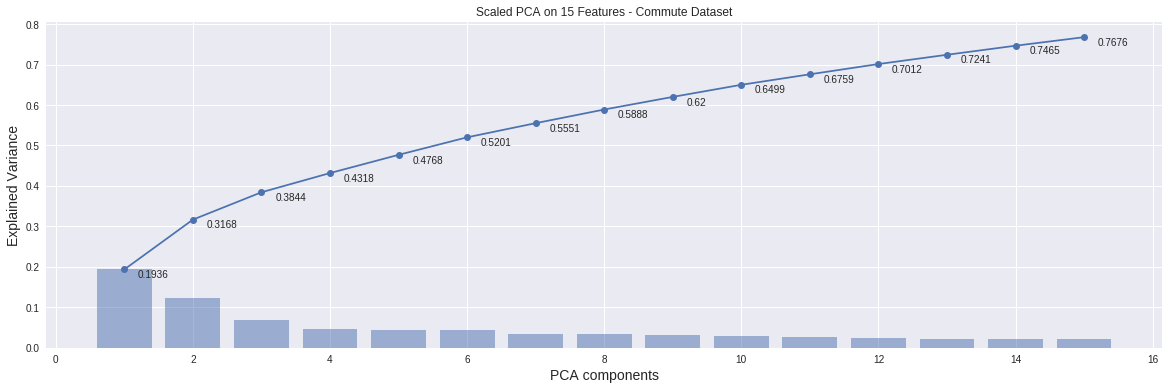

In [19]:
fig = plt.figure(figsize=(20,6))

x = np.arange(1,16)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, cumulative_explained_variance,'-o')
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

plt.xlabel('PCA components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Scaled PCA on 15 Features - Commute Dataset')
plt.savefig('./figures/Scaled_PCA_on_15_features.png')

## 5. Cluster Analysis on PCA

* Use unsupervised learning to find clusters of similar data in the principal components.

  8%|▊         | 1/13 [00:00<00:04,  2.48it/s]

For n_clusters = 2 The average silhouette_score is : 0.153141169524


 15%|█▌        | 2/13 [00:00<00:03,  2.81it/s]

For n_clusters = 3 The average silhouette_score is : 0.140421513468


 23%|██▎       | 3/13 [00:00<00:03,  3.01it/s]

For n_clusters = 4 The average silhouette_score is : 0.144093864653


 31%|███       | 4/13 [00:01<00:02,  3.05it/s]

For n_clusters = 5 The average silhouette_score is : 0.133335590012


 38%|███▊      | 5/13 [00:01<00:02,  2.91it/s]

For n_clusters = 6 The average silhouette_score is : 0.119568978933


 46%|████▌     | 6/13 [00:02<00:02,  2.87it/s]

For n_clusters = 7 The average silhouette_score is : 0.113935926728


 54%|█████▍    | 7/13 [00:02<00:02,  2.77it/s]

For n_clusters = 8 The average silhouette_score is : 0.117604607185


 62%|██████▏   | 8/13 [00:02<00:01,  2.74it/s]

For n_clusters = 9 The average silhouette_score is : 0.110451784274


 69%|██████▉   | 9/13 [00:03<00:01,  2.62it/s]

For n_clusters = 10 The average silhouette_score is : 0.119208697585


 77%|███████▋  | 10/13 [00:03<00:01,  2.65it/s]

For n_clusters = 11 The average silhouette_score is : 0.112996004698


 85%|████████▍ | 11/13 [00:04<00:00,  2.66it/s]

For n_clusters = 12 The average silhouette_score is : 0.0969254945585
For n_clusters = 13 The average silhouette_score is : 0.107628730993


100%|██████████| 13/13 [00:04<00:00,  2.61it/s]

For n_clusters = 14 The average silhouette_score is : 0.109965139982


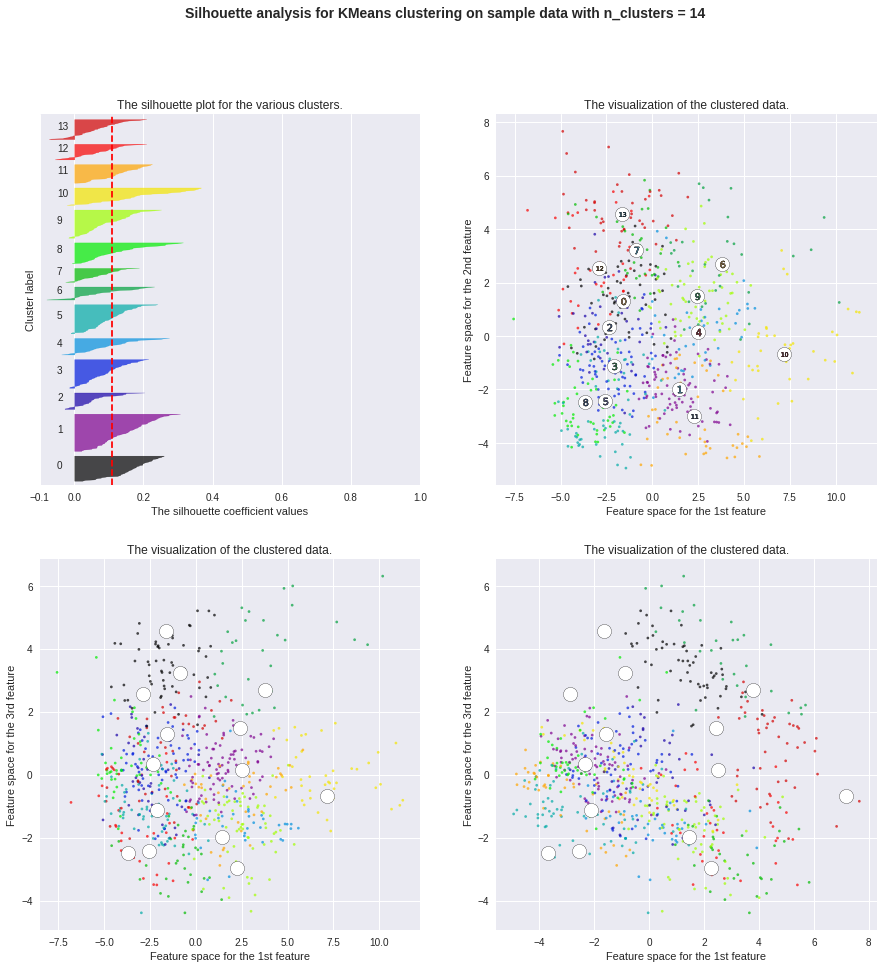

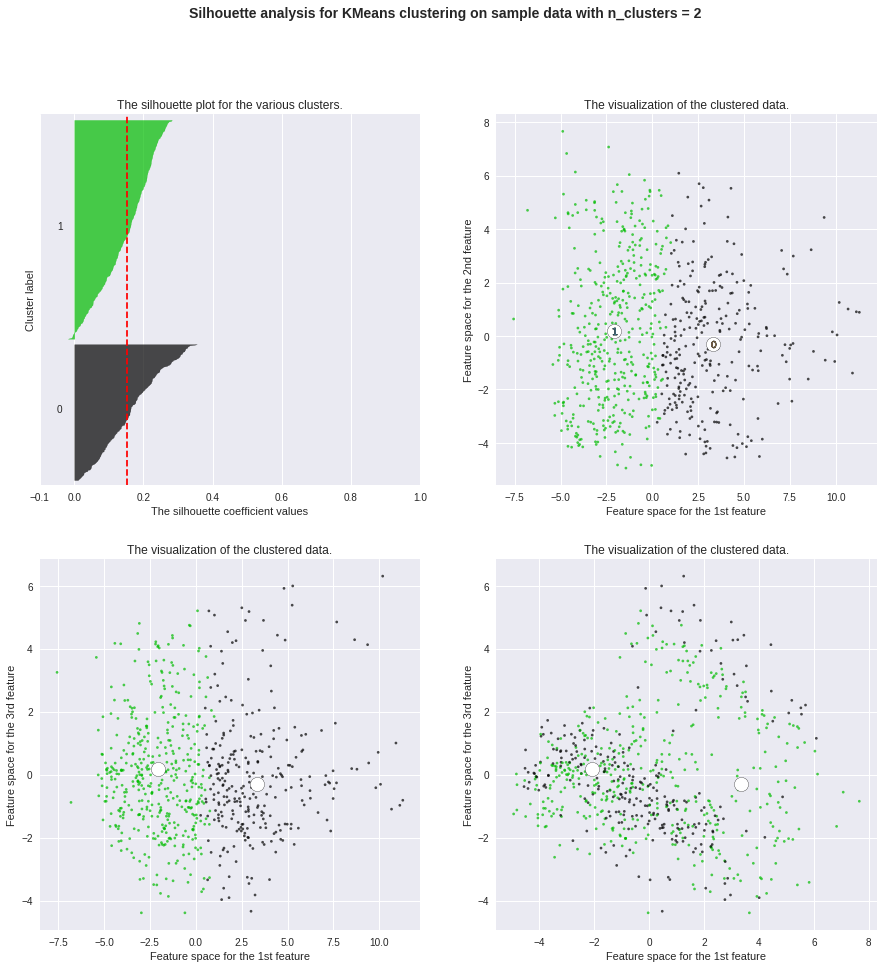

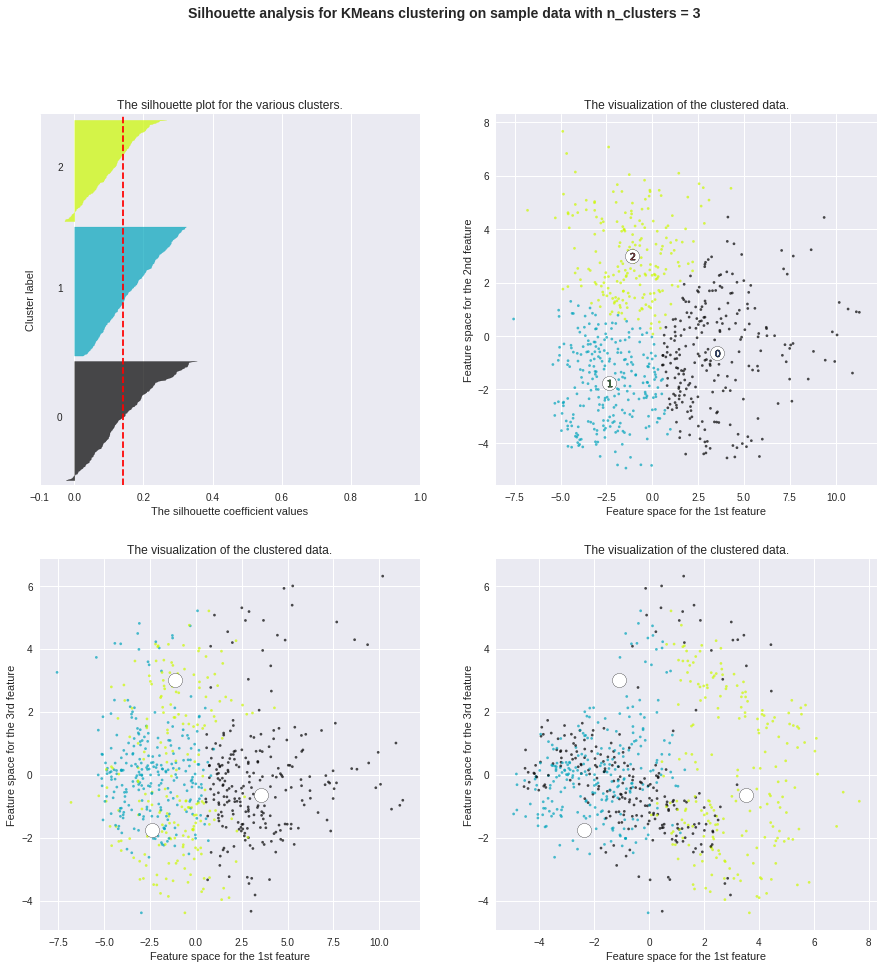

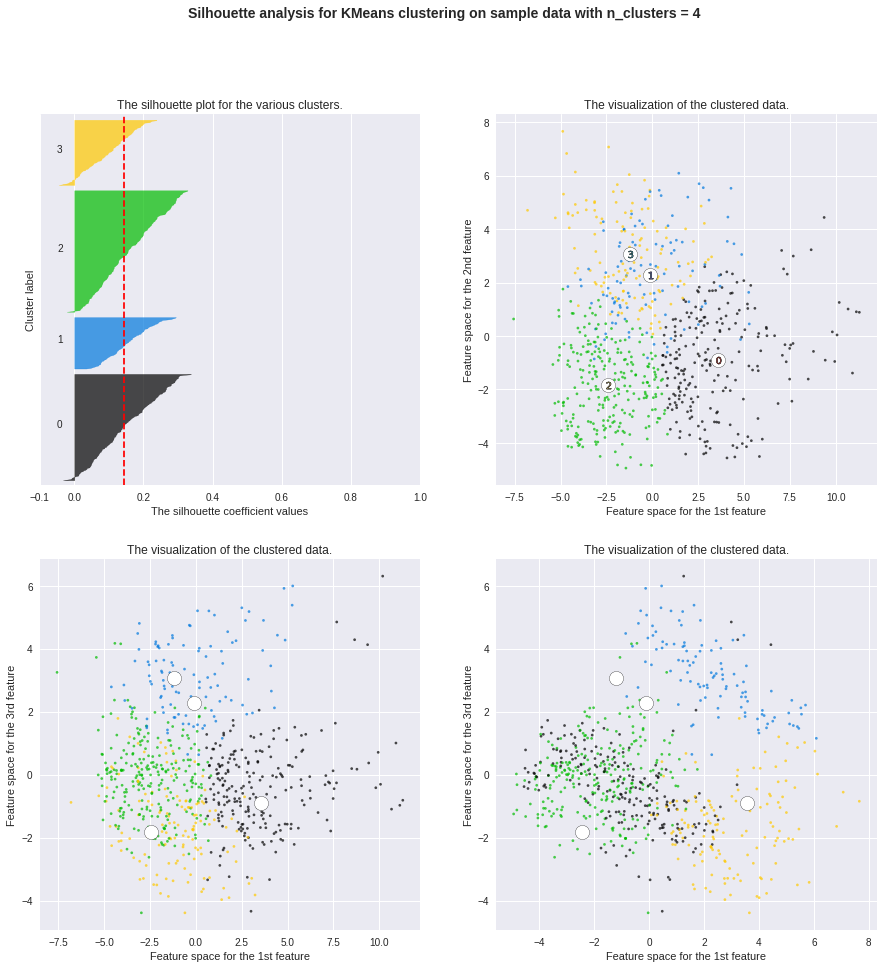

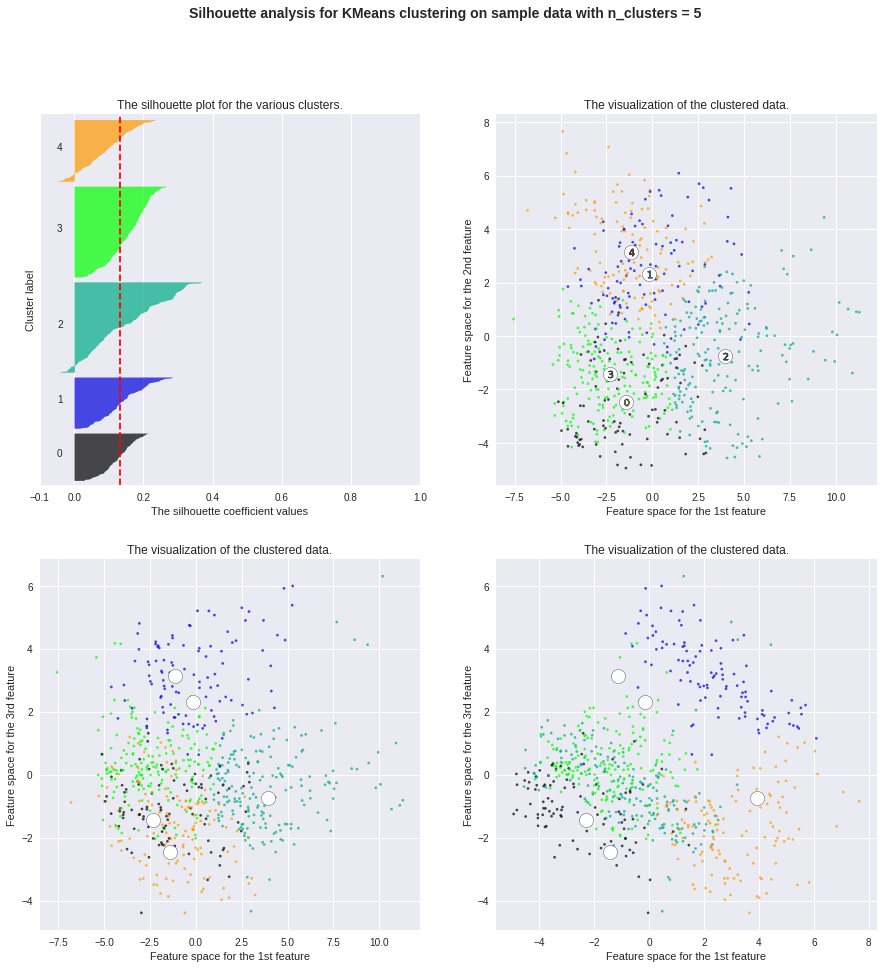

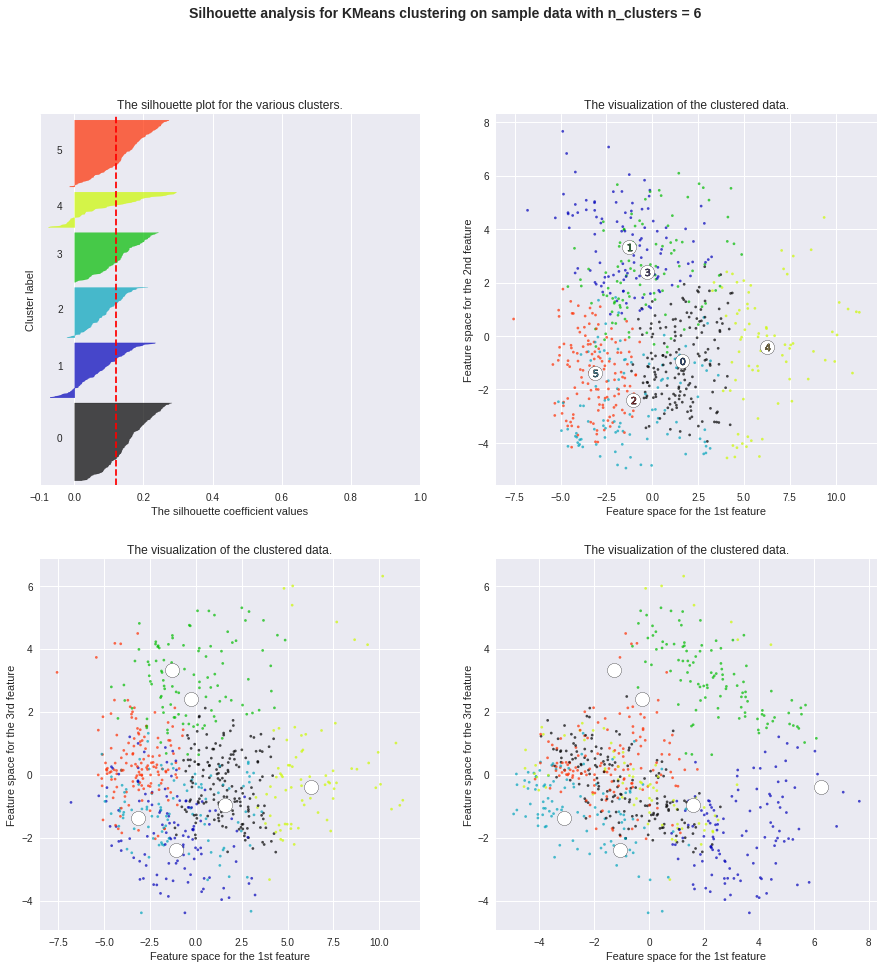

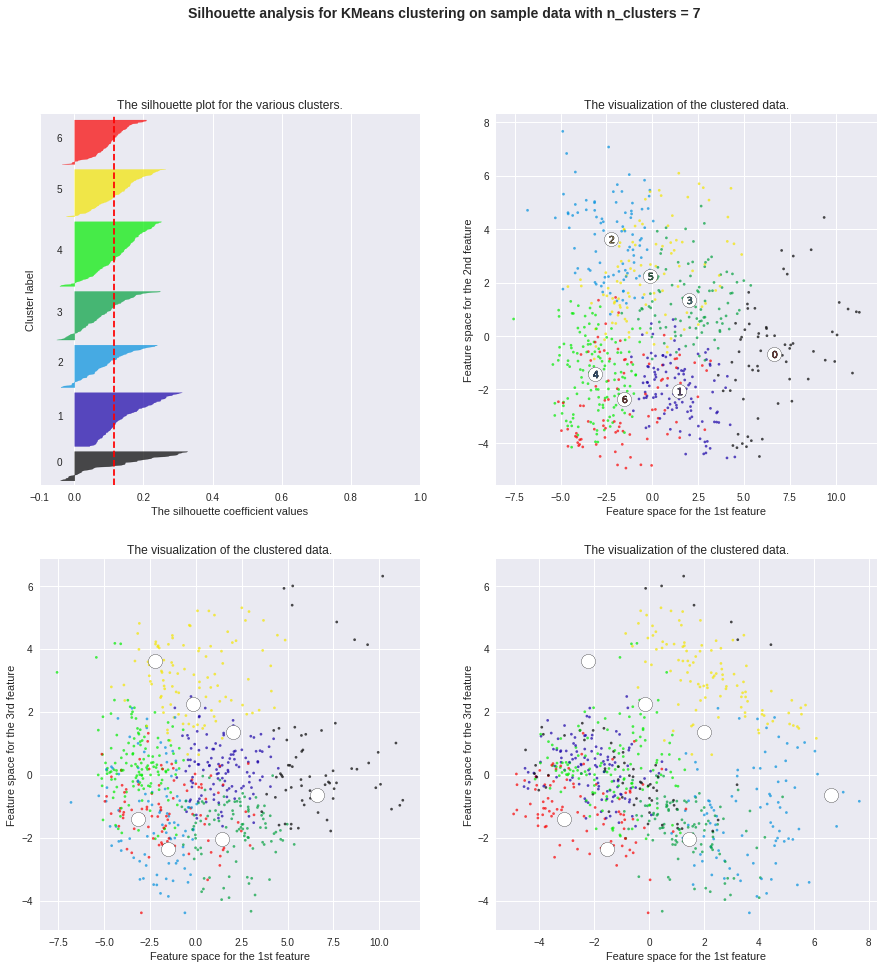

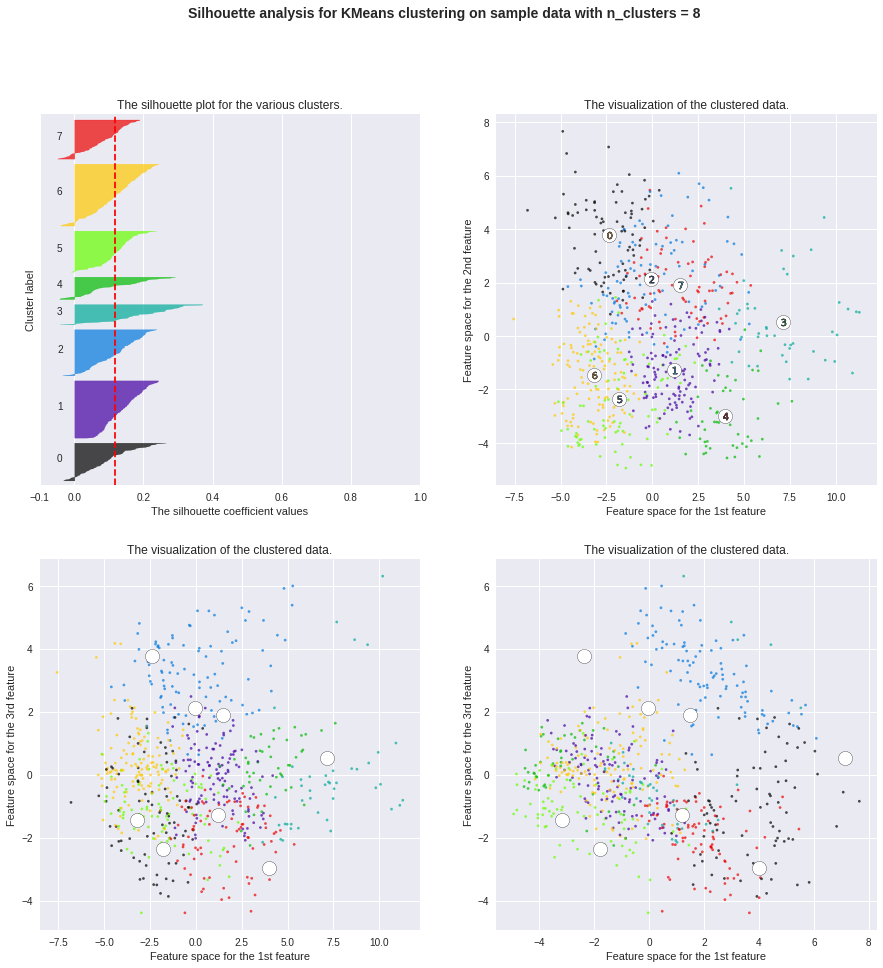

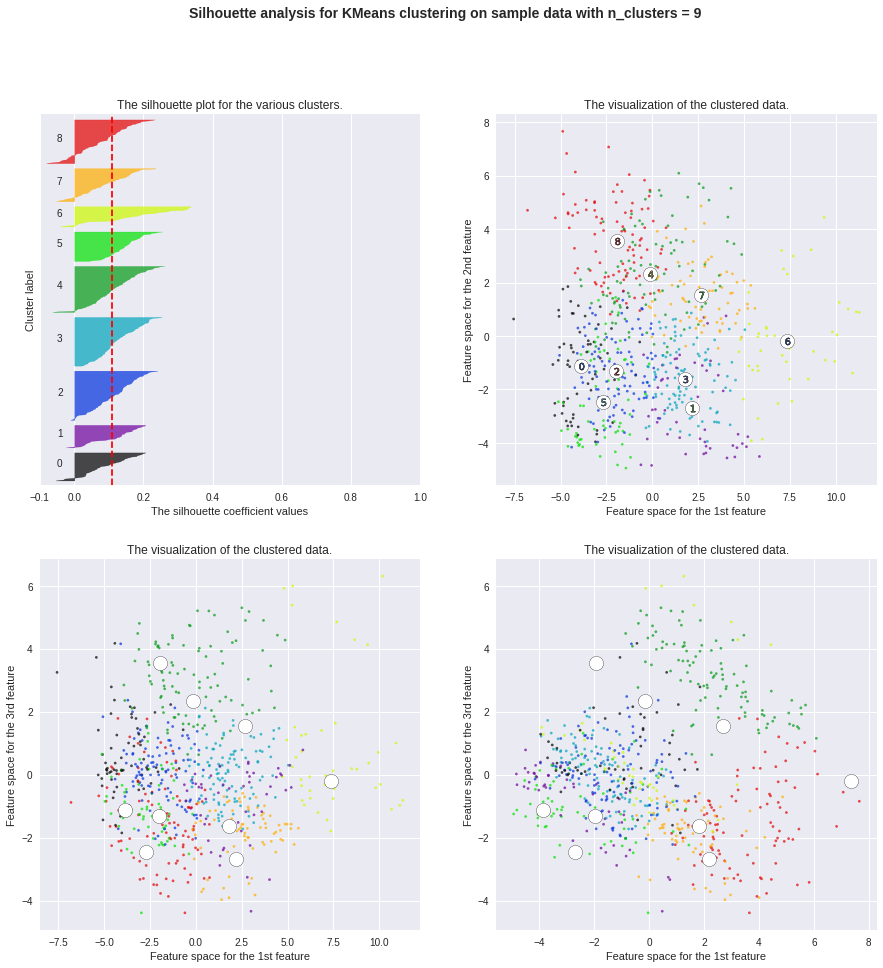

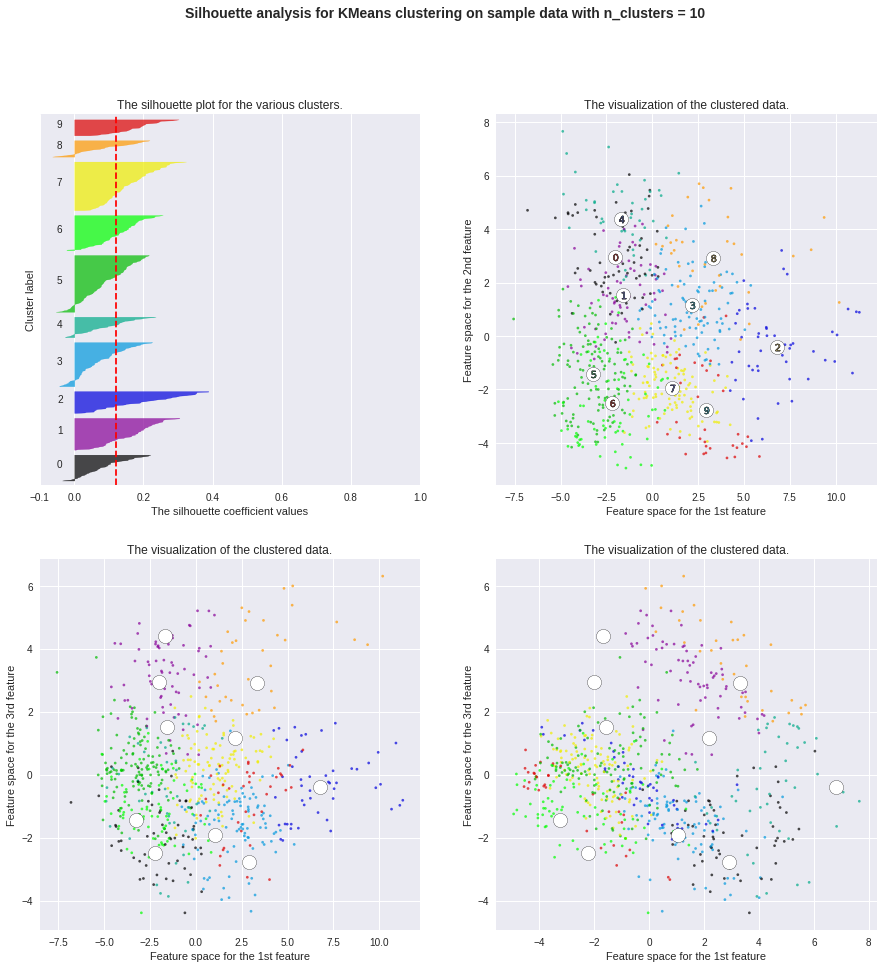

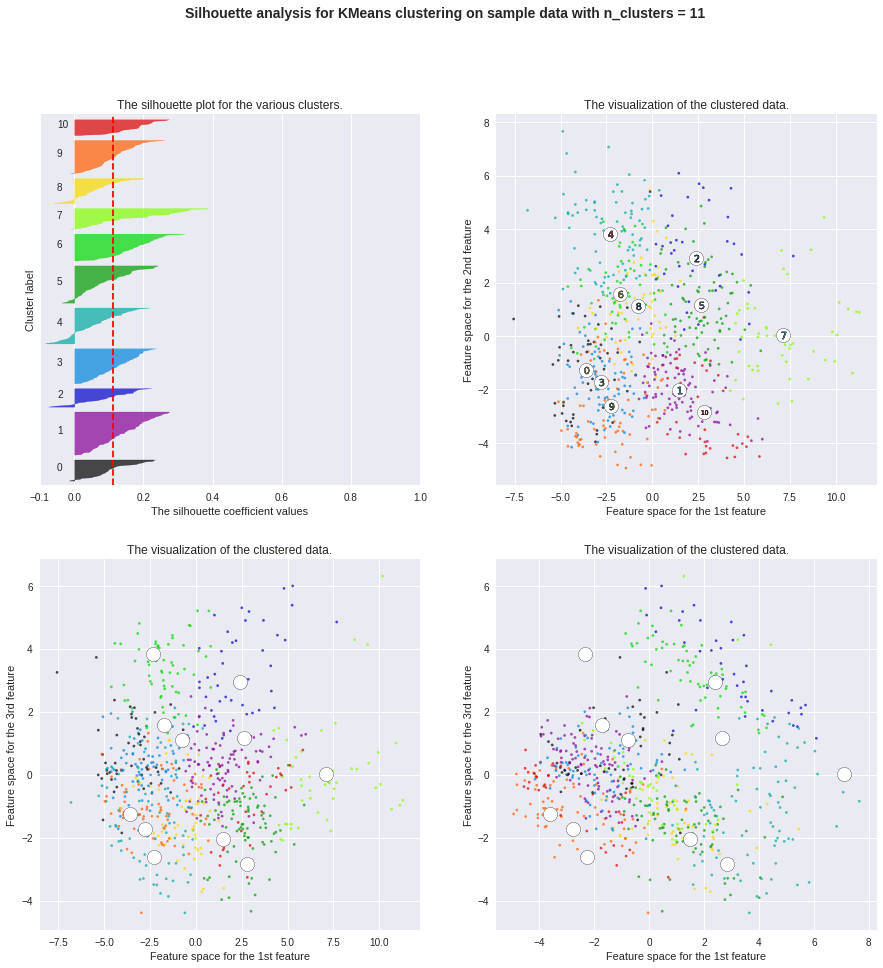

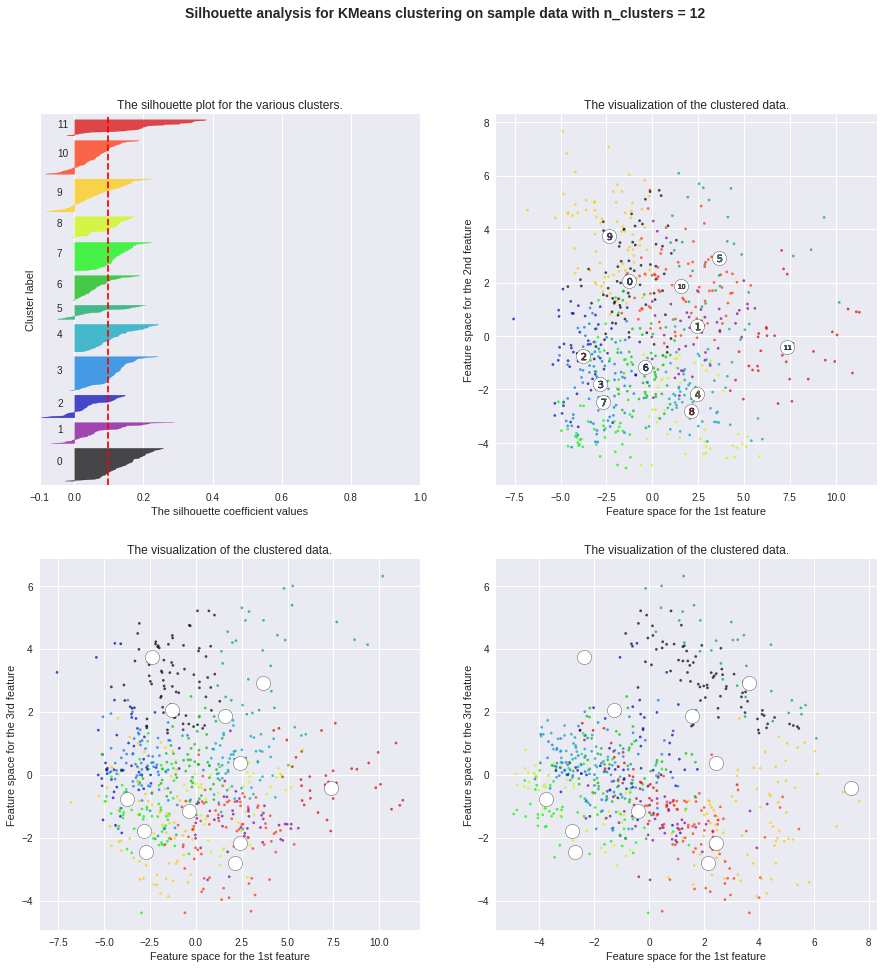

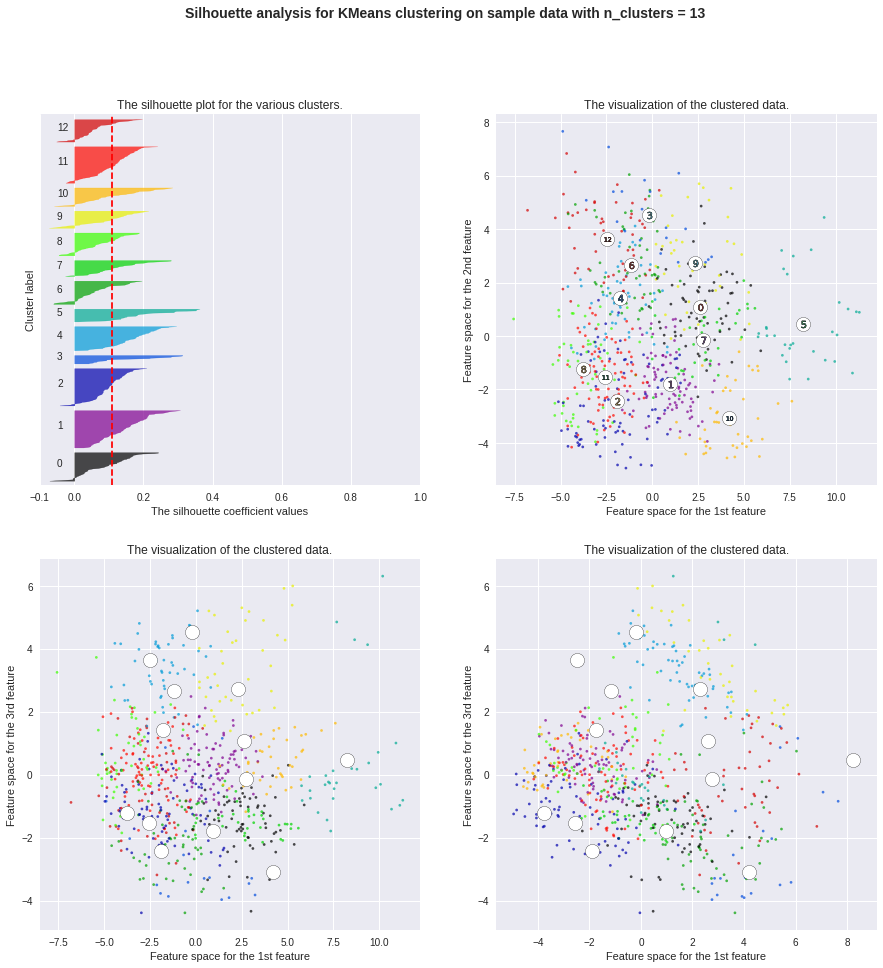

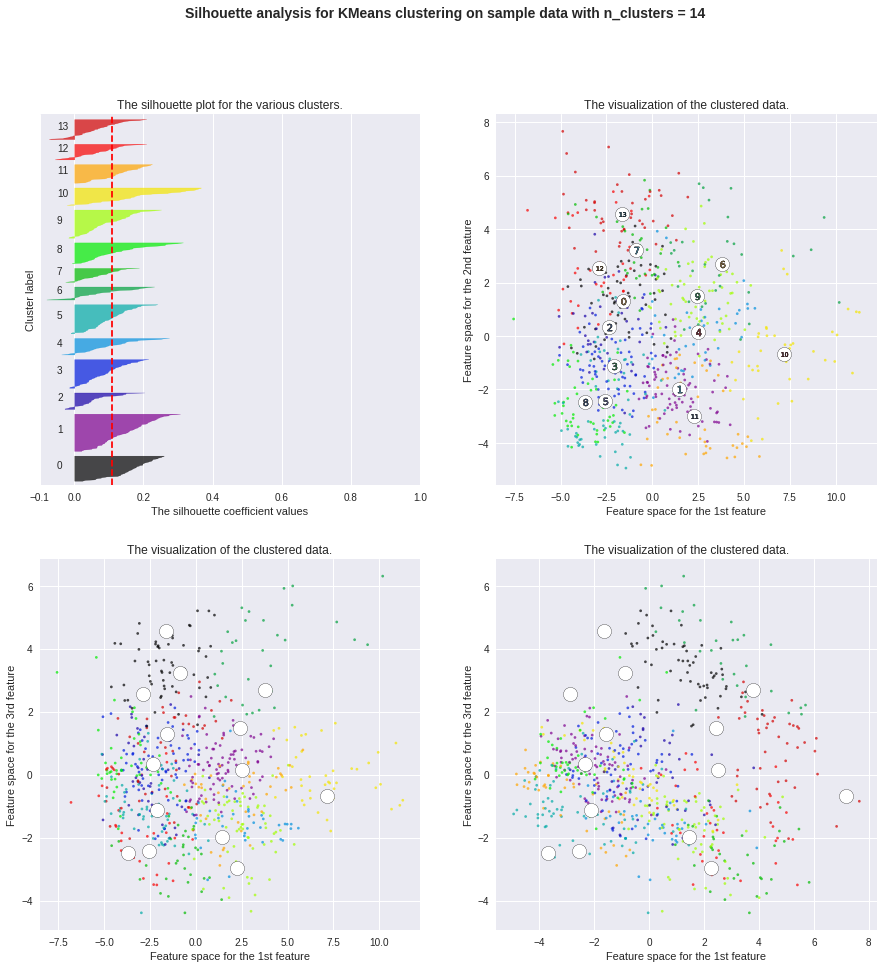

In [20]:
# look at a range of clusters to decide visually which ones represent the data most clearly.
cluster_range(X_train_pca, range(2,15))

100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

For n_clusters = 3 The average silhouette_score is : 0.140367502191


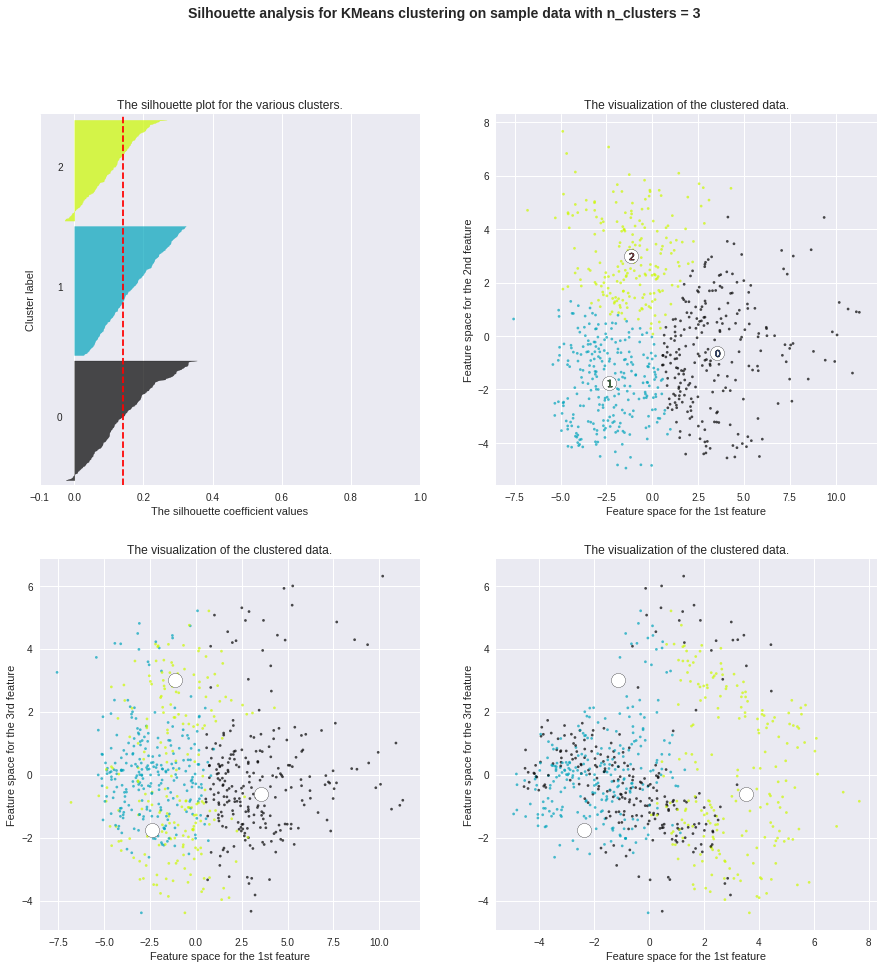

In [21]:
# look at just a cluster of 3, save fig.
cluster_three = cluster_range(X_train_pca, range(3,4))
cluster_three.savefig('./figures/cluster_analysis_PCA.png')

## 6. Augment Datasets with PCA Data
* Combine numerical and categorical data back together
* Concatenate PCA data to dataset.

In [22]:
for col in X_train_sc_df.columns:
    X_train[col] = X_train_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
X_train_plus_pca_df = pd.concat([X_train, X_train_pca_df], axis=1)
X_train_plus_pca_df.shape

(707, 115)

In [24]:
for col in X_test_sc_df.columns:
    X_test[col] = X_test_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
X_test_plus_pca_df = pd.concat([X_test, X_test_pca_df], axis=1)
X_test_plus_pca_df.shape

(304, 115)

## 7. Pickling

In [26]:
# entire X_train and X_test data with augmented deskewed and scaled data and pca data
X_train_plus_pca_df.to_pickle('./data/X_train_plus_pca_df.pkl')
X_test_plus_pca_df.to_pickle('./data/X_test_plus_pca_df.pkl')

# X_train and X_test pca data
X_train_pca_df.to_pickle('./data/X_train_pca_df.pkl')
X_test_pca_df.to_pickle('./data/X_test_pca_df.pkl')

# y_train, y_test to run models.
y_train.to_pickle('./data/y_train_new.pkl')
y_test.to_pickle('./data/y_test_new.pkl')